Consider the Amazon Alexa Reviews Dataset. This dataset consists
of a nearly 3000 Amazon customer reviews (input text), star
ratings, date of review, variant and feedback of various amazon
Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.
Perform follwing operations on this dataset.
(i) Plot a graph of Positive and Negative Feedback (1 = Positive
Feedback, 0 = Negative Feedback)
(ii) Plot the graph of Ratings distibution.
(iii) Convert the review text into lowercase
(iv) Remove all punctuations from review text.
(v) Remove emoticons and emojis from the text
(vi) Tokenize the review text into words.
(vii) Remove the stopwords from the tokenized text.
(viii) Perform stemming & lemmatization on the review text.
(ix) Perform the word vectorization on review text using Bag of
Words technique.
(x) Create representation of Review Text by calculating Term
Frequency and Inverse Document Frequency (TF-IDF)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataframe = pd.read_excel('/content/amazon_alexa.xlsx')

In [ ]:
dataframe.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


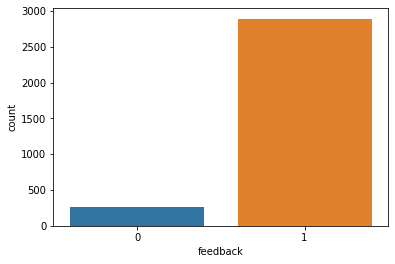

In [ ]:
import seaborn as sns

sns.countplot(x='feedback', data=dataframe)

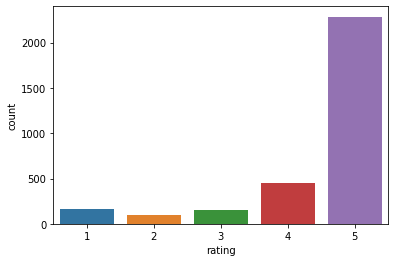

In [ ]:
sns.countplot(x='rating', data=dataframe)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 123.2+ KB


In [ ]:
dataframe['verified_reviews'] = dataframe['verified_reviews'].astype('string').str.lower()
dataframe.dtypes

rating                       int64
date                datetime64[ns]
variation                   object
verified_reviews            string
feedback                     int64
dtype: object

remove puntuation

In [ ]:
import string

def remove_punctuation(text):
  punctuation_free = ''.join([i for i in text if i not in string.punctuation])
  return punctuation_free

dataframe['verified_reviews'] = dataframe['verified_reviews'].apply(remove_punctuation)
dataframe.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,love my echo,1
1,5,2018-07-31,Charcoal Fabric,loved it,1
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer ...,1
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1
4,5,2018-07-31,Charcoal Fabric,music,1


(v) Remove emoticons and emojis from the text

In [ ]:
dataframe = dataframe.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
dataframe

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,love my echo,1
1,5,2018-07-31,Charcoal Fabric,loved it,1
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer ...,1
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1
4,5,2018-07-31,Charcoal Fabric,music,1
...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,perfect for kids adults and everyone in between,1
3146,5,2018-07-30,Black Dot,listening to music searching locations checkin...,1
3147,5,2018-07-30,Black Dot,i do love these things i have them running my ...,1
3148,5,2018-07-30,White Dot,only complaint i have is that the sound qualit...,1


tokenize

In [38]:
import nltk
nltk.download('punkt')

def tokenize(text):
  return nltk.word_tokenize(text)

dataframe['tokenized'] = dataframe['verified_reviews'].apply(tokenize)
dataframe

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,rating,date,variation,verified_reviews,feedback,tokenized
0,5,2018-07-31,Charcoal Fabric,love my echo,1,"[love, my, echo]"
1,5,2018-07-31,Charcoal Fabric,loved it,1,"[loved, it]"
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer ...,1,"[sometimes, while, playing, a, game, you, can,..."
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1,"[i, have, had, a, lot, of, fun, with, this, th..."
4,5,2018-07-31,Charcoal Fabric,music,1,[music]
...,...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,perfect for kids adults and everyone in between,1,"[perfect, for, kids, adults, and, everyone, in..."
3146,5,2018-07-30,Black Dot,listening to music searching locations checkin...,1,"[listening, to, music, searching, locations, c..."
3147,5,2018-07-30,Black Dot,i do love these things i have them running my ...,1,"[i, do, love, these, things, i, have, them, ru..."
3148,5,2018-07-30,White Dot,only complaint i have is that the sound qualit...,1,"[only, complaint, i, have, is, that, the, soun..."


In [44]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stopwords(text):
  words = []
  for word in text:
    if word not in stop_words:
      words.append(word)
  text = ' '.join(words)
  return text


dataframe['without_stopwords'] = dataframe['tokenized'].apply(remove_stopwords)
dataframe[['without_stopwords', 'tokenized']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,without_stopwords,tokenized
0,love echo,"[love, my, echo]"
1,loved,"[loved, it]"
2,sometimes playing game answer question correct...,"[sometimes, while, playing, a, game, you, can,..."
3,lot fun thing 4 yr old learns dinosaurs contro...,"[i, have, had, a, lot, of, fun, with, this, th..."
4,music,[music]
